# Enunciado
Faça uma análise do dataset antes de mais nada, verificando:
-características gerais
-se tem campos nulos

Uma vez feito isso, faça para o dataset:
1) plote o grafico scatterplot com seaborn de cada feature dependente em relação ao target. Depois imprima o pairplot.
2) Observando os gráficos o que se pode concluir?
3) Gerar X e y: X com as features dependentes, y com o target
4) Divir o dataset em treino e teste (30%), com random_state=42
X_train, X_test, y_train, y_test
5) Criar um modelo de regressão linear usando sklearn
6) Treinar o modelo com os dados de treino
7) Realizar a predição com os dados de teste
8) Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores de teste preditos.
9) Avalie o modelo com MAE, MSE, RMSE, R2 ajustado, MAPE para os dados de teste. O que se pode concluir?
10) Conclusões finais:
- Em qual plataforma a empresa deve investir e porque ?
- A cada aumento em uma unidade no valor de x1 temos um aumento de quanto no valor do target? Faça o mesmo para x2, x3, x4.

Link Notebook: https://colab.research.google.com/drive/1yZM6qYXlqlk1hjgOc6lRhjcN3v00eJN3?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#Carregando Dataset
df = pd.read_csv('Dataset/dados_regressao_linear_final_4_SemRotulo.csv', sep=';')
df.head()

,X1,X2,X3,X4,X5
0,92,45,168.533552,9,27654.418970
1,37,151,190.159344,1,34518.657042
2,53,47,254.250902,2,29265.435380
3,33,31,268.492560,9,20493.368922
4,67,139,75.336520,9,32065.440852


# Analisando caracteristicas gerais

In [3]:
df.describe()

,X1,X2,X3,X4,X5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,62.042000,92.258000,147.603719,4.959000,31644.228056
std,33.477769,52.109028,85.177006,2.596933,5821.560224
min,5.000000,1.000000,0.976051,1.000000,14335.922326
25%,33.000000,47.000000,74.391901,3.000000,27782.888299
50%,62.000000,94.000000,146.096909,5.000000,31782.775318
75%,92.000000,139.000000,219.971946,7.000000,35583.759347
max,119.000000,179.000000,316.639957,9.000000,49311.999020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   int64  
 1   X2      1000 non-null   int64  
 2   X3      1000 non-null   float64
 3   X4      1000 non-null   int64  
 4   X5      1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


In [5]:
df.isna().sum() #Verificando dados nulos

X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

<Axes: xlabel='X1', ylabel='X5'>

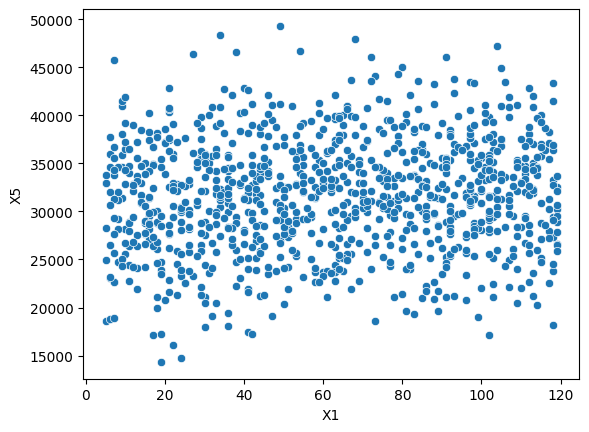

In [6]:
sns.scatterplot(x='X1', y='X5', data=df)

<Axes: xlabel='X2', ylabel='X5'>

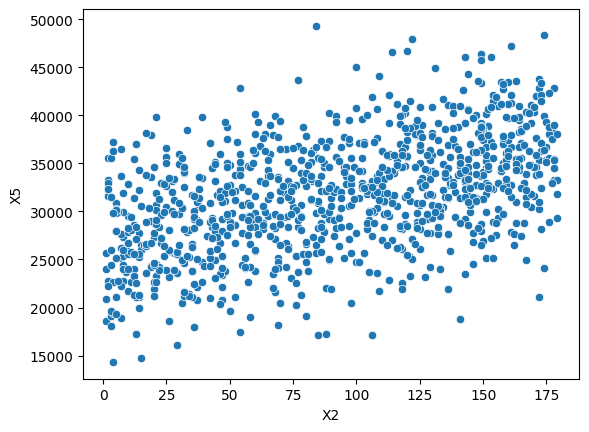

In [7]:
sns.scatterplot(x='X2', y='X5', data=df)

<Axes: xlabel='X2', ylabel='X5'>

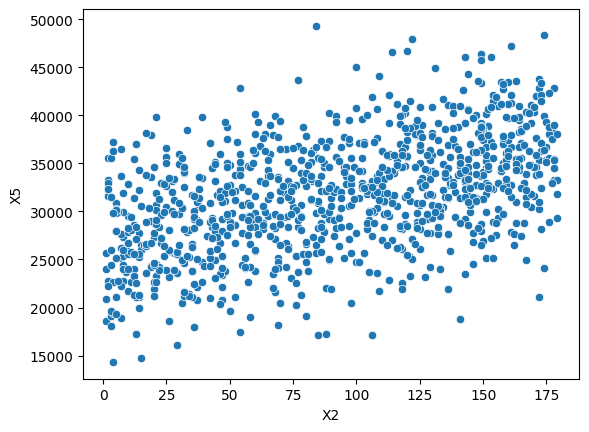

In [8]:
sns.scatterplot(x='X2', y='X5', data=df)

<Axes: xlabel='X3', ylabel='X5'>

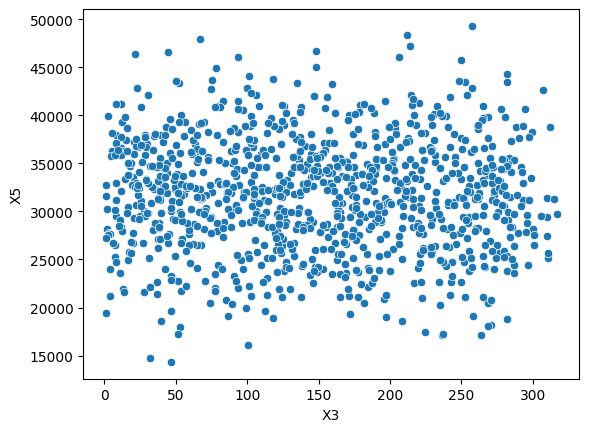

In [9]:
sns.scatterplot(x='X3', y='X5', data=df)

<Axes: xlabel='X4', ylabel='X5'>

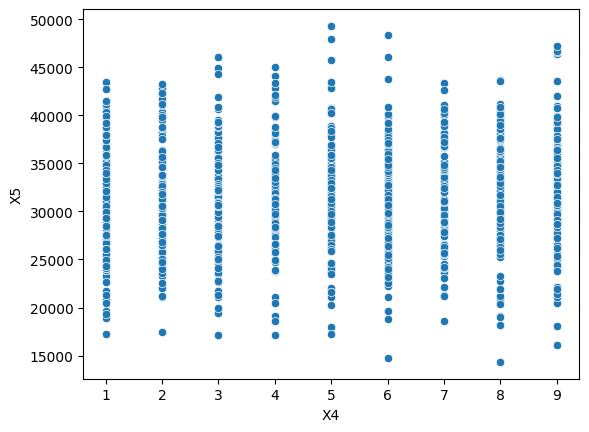

In [10]:
sns.scatterplot(x='X4', y='X5', data=df)

/home/erivelton/anaconda3/envs/AprendizadoMaquina/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


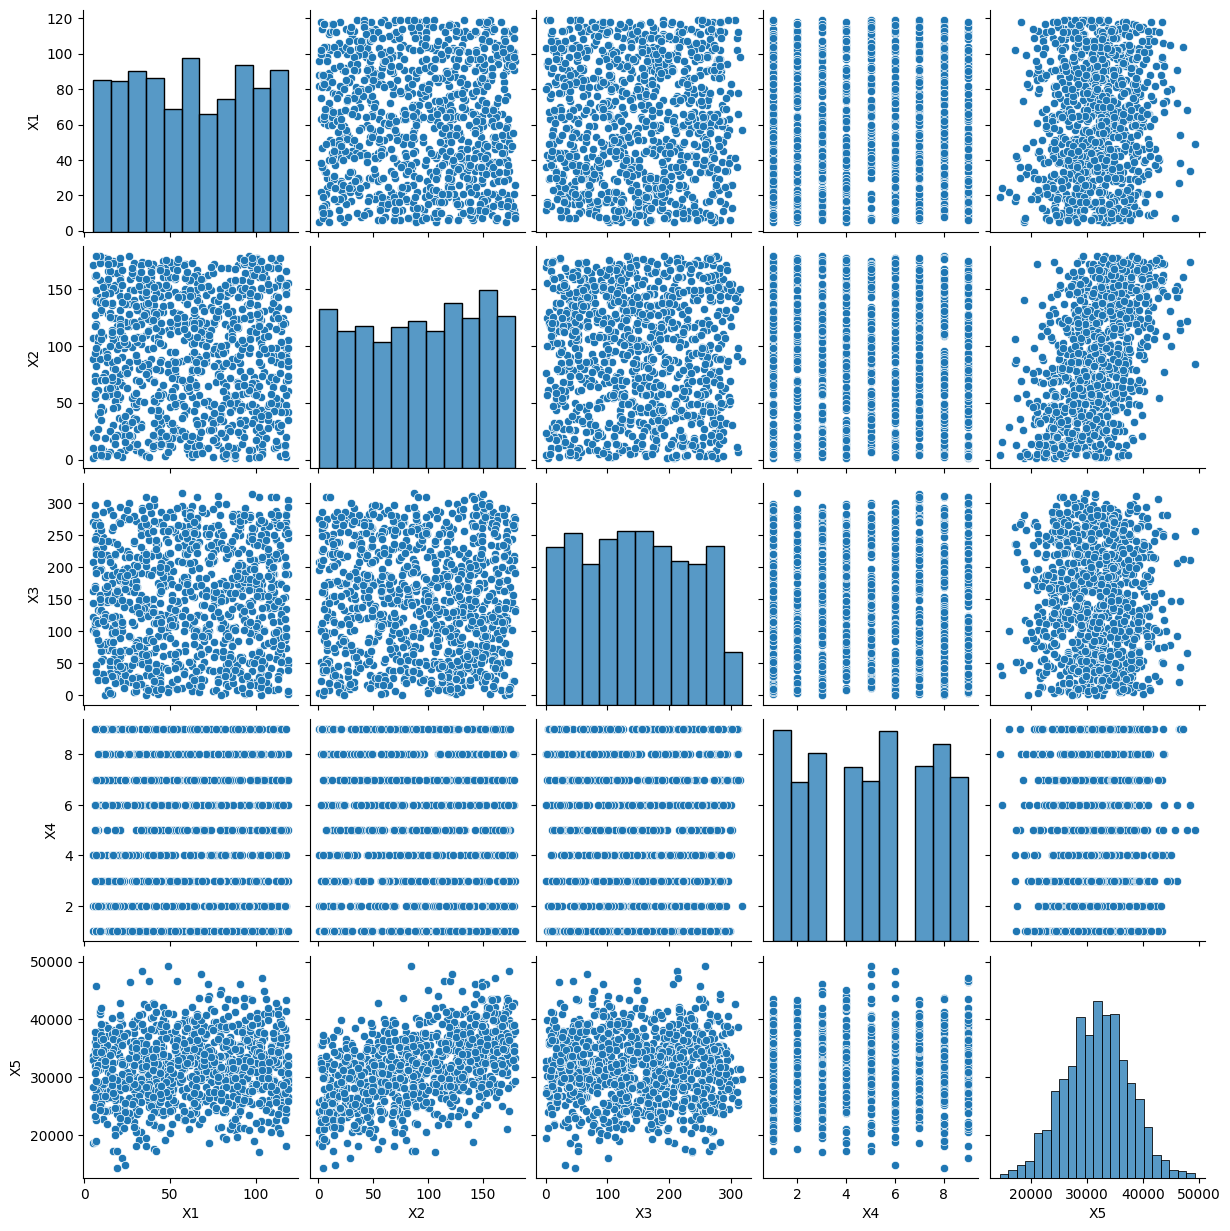

In [11]:
sns.pairplot(df)

<Axes: >

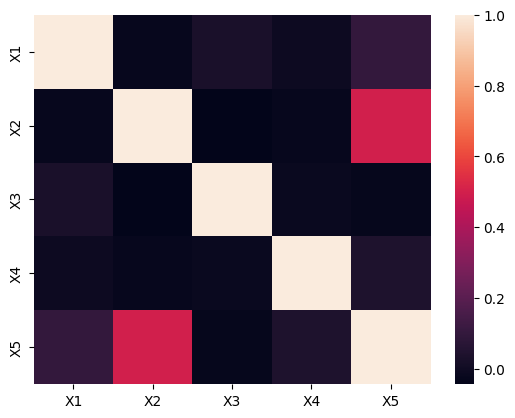

In [12]:
#Verificando a correlacao entre variaveis
sns.heatmap(df.corr())

In [13]:
df.corr()

,X1,X2,X3,X4,X5
X1,1.000000,-0.025929,0.029547,-0.009203,0.098884
X2,-0.025929,1.000000,-0.043585,-0.027099,0.497466
X3,0.029547,-0.043585,1.000000,-0.015997,-0.027727
X4,-0.009203,-0.027099,-0.015997,1.000000,0.038375
X5,0.098884,0.497466,-0.027727,0.038375,1.000000


### A regressão linear é uma escolha apropriada quando existe uma relação linear entre as variáveis independentes (X1, X2, X3, X4) e a variável dependente (X5). No entanto, a análise da matriz de correlação sugere que essa relação linear não é forte em todos os casos.  A relação entre X2 e X5 parece ser a mais forte, mas ainda assim não é uma correlação muito alta. Isso sugere que, para alguns dos preditores (X1, X3, X4), a relação com X5 não é linear ou é muito fraca. Para fins desse estudo, seguiremos com analise mesmo assim:

# Instaurando algoritmo de Regressao Linear

In [14]:
#Definindo X
X = pd.DataFrame()
X = df.drop(['X5'],axis=1)
X.head()

,X1,X2,X3,X4
0,92,45,168.533552,9
1,37,151,190.159344,1
2,53,47,254.250902,2
3,33,31,268.492560,9
4,67,139,75.336520,9


In [15]:
#Definindo Y
y = df['X5']

In [16]:
#Importando bibliotecas necessarias
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
# Apresentando os coeficientes para cada variável do meu X
lm.coef_

array([ 22.89039153,  53.15340041,   0.23781975, 176.15351624])

In [22]:
# Para validar o modelo no conjunto de teste, você precisa utilizar o método predict()
y_pred_test = lm.predict(X_test)

Text(0, 0.5, 'y predito')

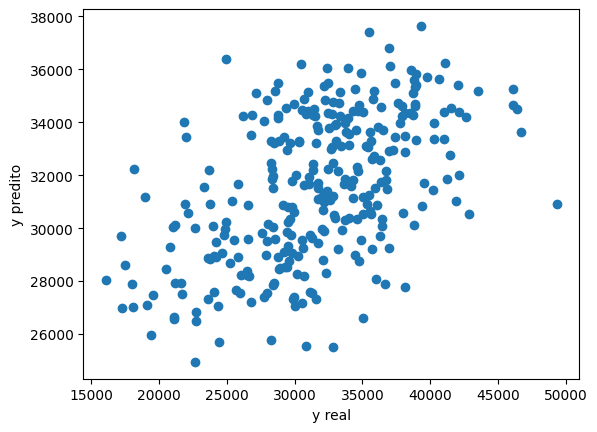

In [23]:
# Criar um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.
plt.scatter(y_test, y_pred_test)
plt.xlabel('y real')
plt.ylabel('y predito')

In [24]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
X1,22.890392
X2,53.153400
X3,0.237820
X4,176.153516


### Portanto, podemos interpretar os coeficientes da seguinte maneira:

#### X1: Para cada aumento de uma unidade em X1, o valor médio da variável dependente X5 aumenta em aproximadamente 22.89 unidades, mantendo todas as outras variáveis constantes.

#### X2: Para cada aumento de uma unidade em X2, o valor médio de X5 aumenta em aproximadamente 53.15 unidades, mantendo todas as outras variáveis constantes.

#### X3: Para cada aumento de uma unidade em X3, o valor médio de X5 aumenta em aproximadamente 0.24 unidades, mantendo todas as outras variáveis constantes.

#### X4: Para cada aumento de uma unidade em X4, o valor médio de X5 aumenta em aproximadamente 176.15 unidades, mantendo todas as outras variáveis constantes.

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('R:', metrics.r2_score(y_test,y_pred_test))

MAE: 4052.0765803855884
MSE: 26449365.664029438
RMSE: 5142.894677516684
R: 0.2642363345731584


In [27]:
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

In [28]:
print('R-adjust:', adjusted_R(y_test, y_pred_test, X_train.shape[1]))

R-adjust: 0.2542598780927945


### Com base nessas métricas, podemos tirar algumas conclusões:
#### O modelo não está fornecendo um bom ajuste aos dados, pois o R² é relativamente baixo.
#### O erro absoluto médio (MAE) e o erro quadrático médio (MSE) são altos, indicando que as previsões têm um erro considerável.
#### O R² ajustado é semelhante ao R², o que sugere que a inclusão de todas as variáveis independentes pode não estar contribuindo significativamente para melhorar a capacidade de previsão do modelo.

## Conclusoes finais:
#### A decisão de investir em uma plataforma específica é uma escolha estratégica crucial para qualquer empresa. A seleção errada pode resultar em desperdício de recursos e oportunidades perdidas. Neste estudo, buscamos avaliar o impacto das variáveis X1, X2, X3 e X4, que representam diferentes plataformas de investimento, sobre a variável dependente X5, que reflete o desempenho financeiro. A análise foi realizada por meio de um modelo de regressão linear simples, visando identificar qual plataforma apresenta o maior potencial de retorno.
#### Ao realizar uma análise de regressão linear simples, obtivemos coeficientes que indicam a relação entre as variáveis dependentes (X1, X2, X3, X4) e a variável independente (X5). No entanto, os resultados apresentaram algumas limitações que devem ser consideradas ao tomar decisões de investimento. Observamos que algumas variáveis independentes, como X1 (Plataforma 1) e X3 (Plataforma 3), apresentam coeficientes de regressão relativamente baixos em comparação com X2 (Plataforma 2) e X4 (Plataforma 4). Isso indica que as Plataformas 1 e 3 têm um impacto menor em relação ao desempenho financeiro (X5). No entanto, as diferenças nos coeficientes não são suficientemente marcantes para determinar com segurança a superioridade de uma plataforma sobre a outra.
#### Portanto, com base nos resultados da análise de regressão linear simples, não é possível concluir com segurança qual plataforma de investimento é a melhor escolha. Os coeficientes obtidos não fornecem uma base sólida para decisões estratégicas de investimento, devido à falta de correlação forte entre algumas variáveis e a variável dependente. 